Text(0.5, 0.92, 'theta = 0, equal control weights')

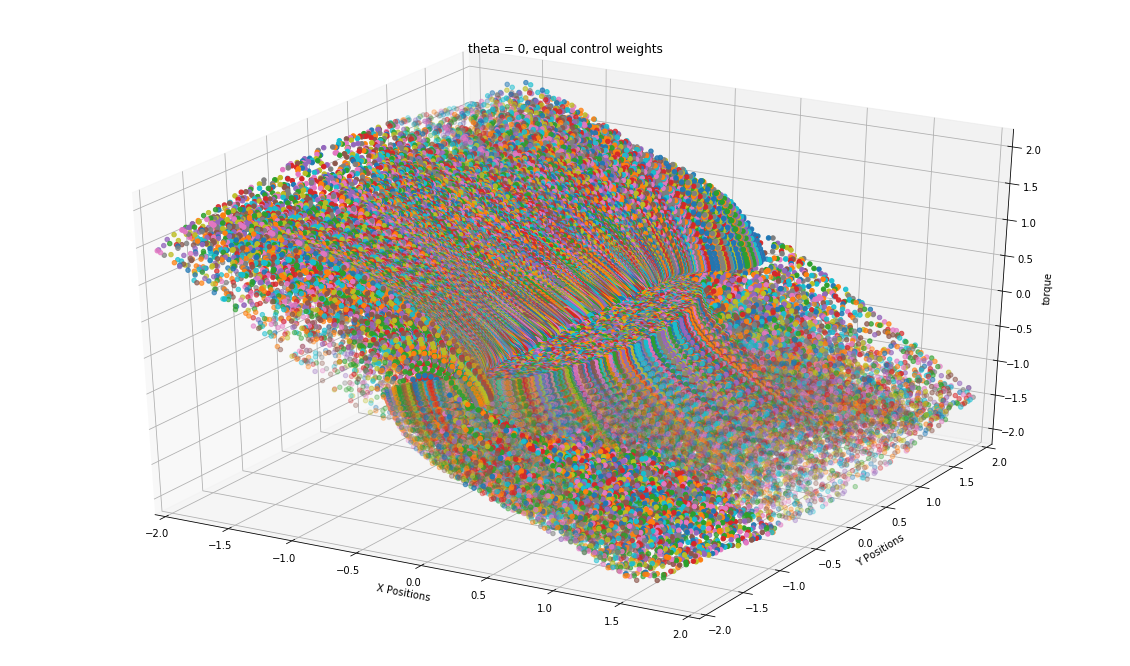

In [6]:
# All things simple, nothing fancy
"""
x and y are randomly sampled while theta(z) = 0

"""
import random, numpy as np, crocoddyl

from mpl_toolkits.mplot3d import axes3d


from matplotlib import cm

import matplotlib.pyplot as plt
%matplotlib inline

crocoddyl.switchToNumpyArray()
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X Positions")
ax.set_ylabel("Y Positions")
ax.set_zlabel("torque")
ax.set_xlim([-2., 2.])
ax.set_ylim([-2., 2])
#ax.text(0, 0, 0, "Goal", color='black')
#ax.text2D(0.0, 0.0, "Goal", transform=ax.transAxes)
ax.scatter3D(0, 0, 0, marker="d", s=50)
#ax.text(0.05, 0, 0, "goal")
for _ in range(10000):
    starting_configurations, optimal_trajectories, controls = [], [], []    
    initial_config = [random.uniform(-2.1, 2.1), random.uniform(-2.1, 2.1), 0]            
    model = crocoddyl.ActionModelUnicycle()

    model.costWeights = np.matrix([1, 1]).T

    problem = crocoddyl.ShootingProblem(np.matrix(initial_config).T, [ model ] * 20, model)
    ddp = crocoddyl.SolverDDP(problem)
    ddp.solve([], [], 100)
    state = np.squeeze(np.array(ddp.xs))
    control = np.squeeze(np.array(ddp.us))

    x = state[1:,0]
    y  =state[1:,1]
    #theta = state[1:,2]
    #z = velocity = control[:,0]
    z = force = control[:,0]
    

    ax.scatter3D(x, y, z, '-')
ax.set_title("theta = 0, equal control weights") 
#plt.savefig("x_y random.png")        


In [ ]:
import plotly.graph_objects as go

for _ in range(1000):
    starting_configurations, optimal_trajectories, controls = [], [], []    
    initial_config = [random.uniform(-2.1, 2.1), random.uniform(-2.1, 2.1), 0]            
    model = crocoddyl.ActionModelUnicycle()

    model.costWeights = np.matrix([10, 0.3]).T

    problem = crocoddyl.ShootingProblem(np.matrix(initial_config).T, [ model ] * 20, model)
    ddp = crocoddyl.SolverDDP(problem)
    ddp.solve([], [], 100)
    state = np.squeeze(np.array(ddp.xs))
    control = np.squeeze(np.array(ddp.us))

    x = state[1:,0]
    y  =state[1:,1]
    #theta = state[1:,2]
    #z = velocity = control[:,0]
    z = force = control[:,0]
    

    fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   )])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()






